In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')
from plotnine import *

In [3]:
shop = pd.read_csv('./data/shop_2022_seoul.csv')
shop.head()

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  MA0101202210A0037544     영자's곱창  NaN        I2       음식      I201       한식   
1  MA0101202210A0097916      호텔클로이  NaN        I1       숙박      I101    일반 숙박   
2  MA0101202210A0096343  나라차중계태권도장  NaN        P1       교육      P106    기타 교육   
3  MA0101202210A0093845      이상한스냅  NaN        M1    과학·기술      M113    사진 촬영   
4  MA010120220805430767        토끼정  NaN        I2       음식      I201       한식   

  상권업종소분류코드  상권업종소분류명 표준산업분류코드  ...                     건물관리번호    건물명  \
0    I20109  곱창 전골/구이   I56111  ...  1121510100101690021003140    NaN   
1    I10102     여관/모텔   I55102  ...  1114014500101300000014092    유성장   
2    P10601  태권도/무술학원   P85611  ...  1135010600103640019010971  삼부프라자   
3    M11301     사진촬영업   M73303  ...  1147010300100090004000001   백송주택   
4    I20101    백반/한정식   I56111  ...  1150010500107740012000001  마커스빌딩   

                 도로명주소   구우편번호 신우편번호  동정보  층정보  호정보          경도         위도  
0    서울특별시 광진구 면목로 172  143900  4904  NaN    1  NaN  127.082832  37.568503  
1   서울특별시 중구 을지로42길 11  100411  4561  NaN  NaN  NaN  127.005849  37.565708  
2  서울특별시 노원구 한글비석로 242  139861  1734  NaN  NaN  NaN  127.076956  37.649226  
3    서울특별시 양천구 월정로 283  158822  7902  NaN  NaN  NaN  126.828832  37.542117  
4    서울특별시 강서구 마곡동로 55  157805  7802  NaN    2  NaN  126.833022  37.560053  

[5 rows x 39 columns]

In [4]:
house = pd.read_csv('./data/서울특별시_전월세가_2022.csv')
house.head()

접수년도  자치구코드  자치구명  법정동코드   법정동명  지번구분코드 지번구분     본번    부번     층  ...  \
0  2022  11560  영등포구  12600  양평동2가     1.0   대지    1.0   3.0   6.0  ...   
1  2022  11560  영등포구  11800    도림동     NaN  NaN    NaN   NaN   NaN  ...   
2  2022  11215   광진구  10700    화양동     1.0   대지  111.0  12.0  19.0  ...   
3  2022  11620   관악구  10100    봉천동     NaN  NaN    NaN   NaN   NaN  ...   
4  2022  11620   관악구  10100    봉천동     NaN  NaN    NaN   NaN   NaN  ...   

   보증금(만원) 임대료(만원)   건물명    건축년도   건물용도         계약기간  신규계약구분 갱신청구권사용 종전보증금  \
0    16000       0  힘멜하임  2014.0   오피스텔  22.01~24.01      신규     NaN   0.0   
1      300      30   NaN  1986.0  단독다가구          NaN     NaN     NaN   NaN   
2    10000     135   NaN  2021.0   오피스텔  22.01~24.01      신규     NaN   0.0   
3     4000      40   NaN  2019.0  단독다가구  22.02~23.02      신규     NaN   0.0   
4    13000       0   NaN  2019.0  단독다가구  22.01~24.01      신규     NaN   0.0   

  종전임대료  
0   NaN  
1   NaN  
2   0.0  
3   0.0  
4   NaN  

[5 rows x 23 columns]

In [5]:
shop.columns
print(type(shop.columns))

<class 'pandas.core.indexes.base.Index'>


In [6]:
shop.drop(['동정보' ,'호정보' , '층정보'] ,axis=1, inplace=True)
shop.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

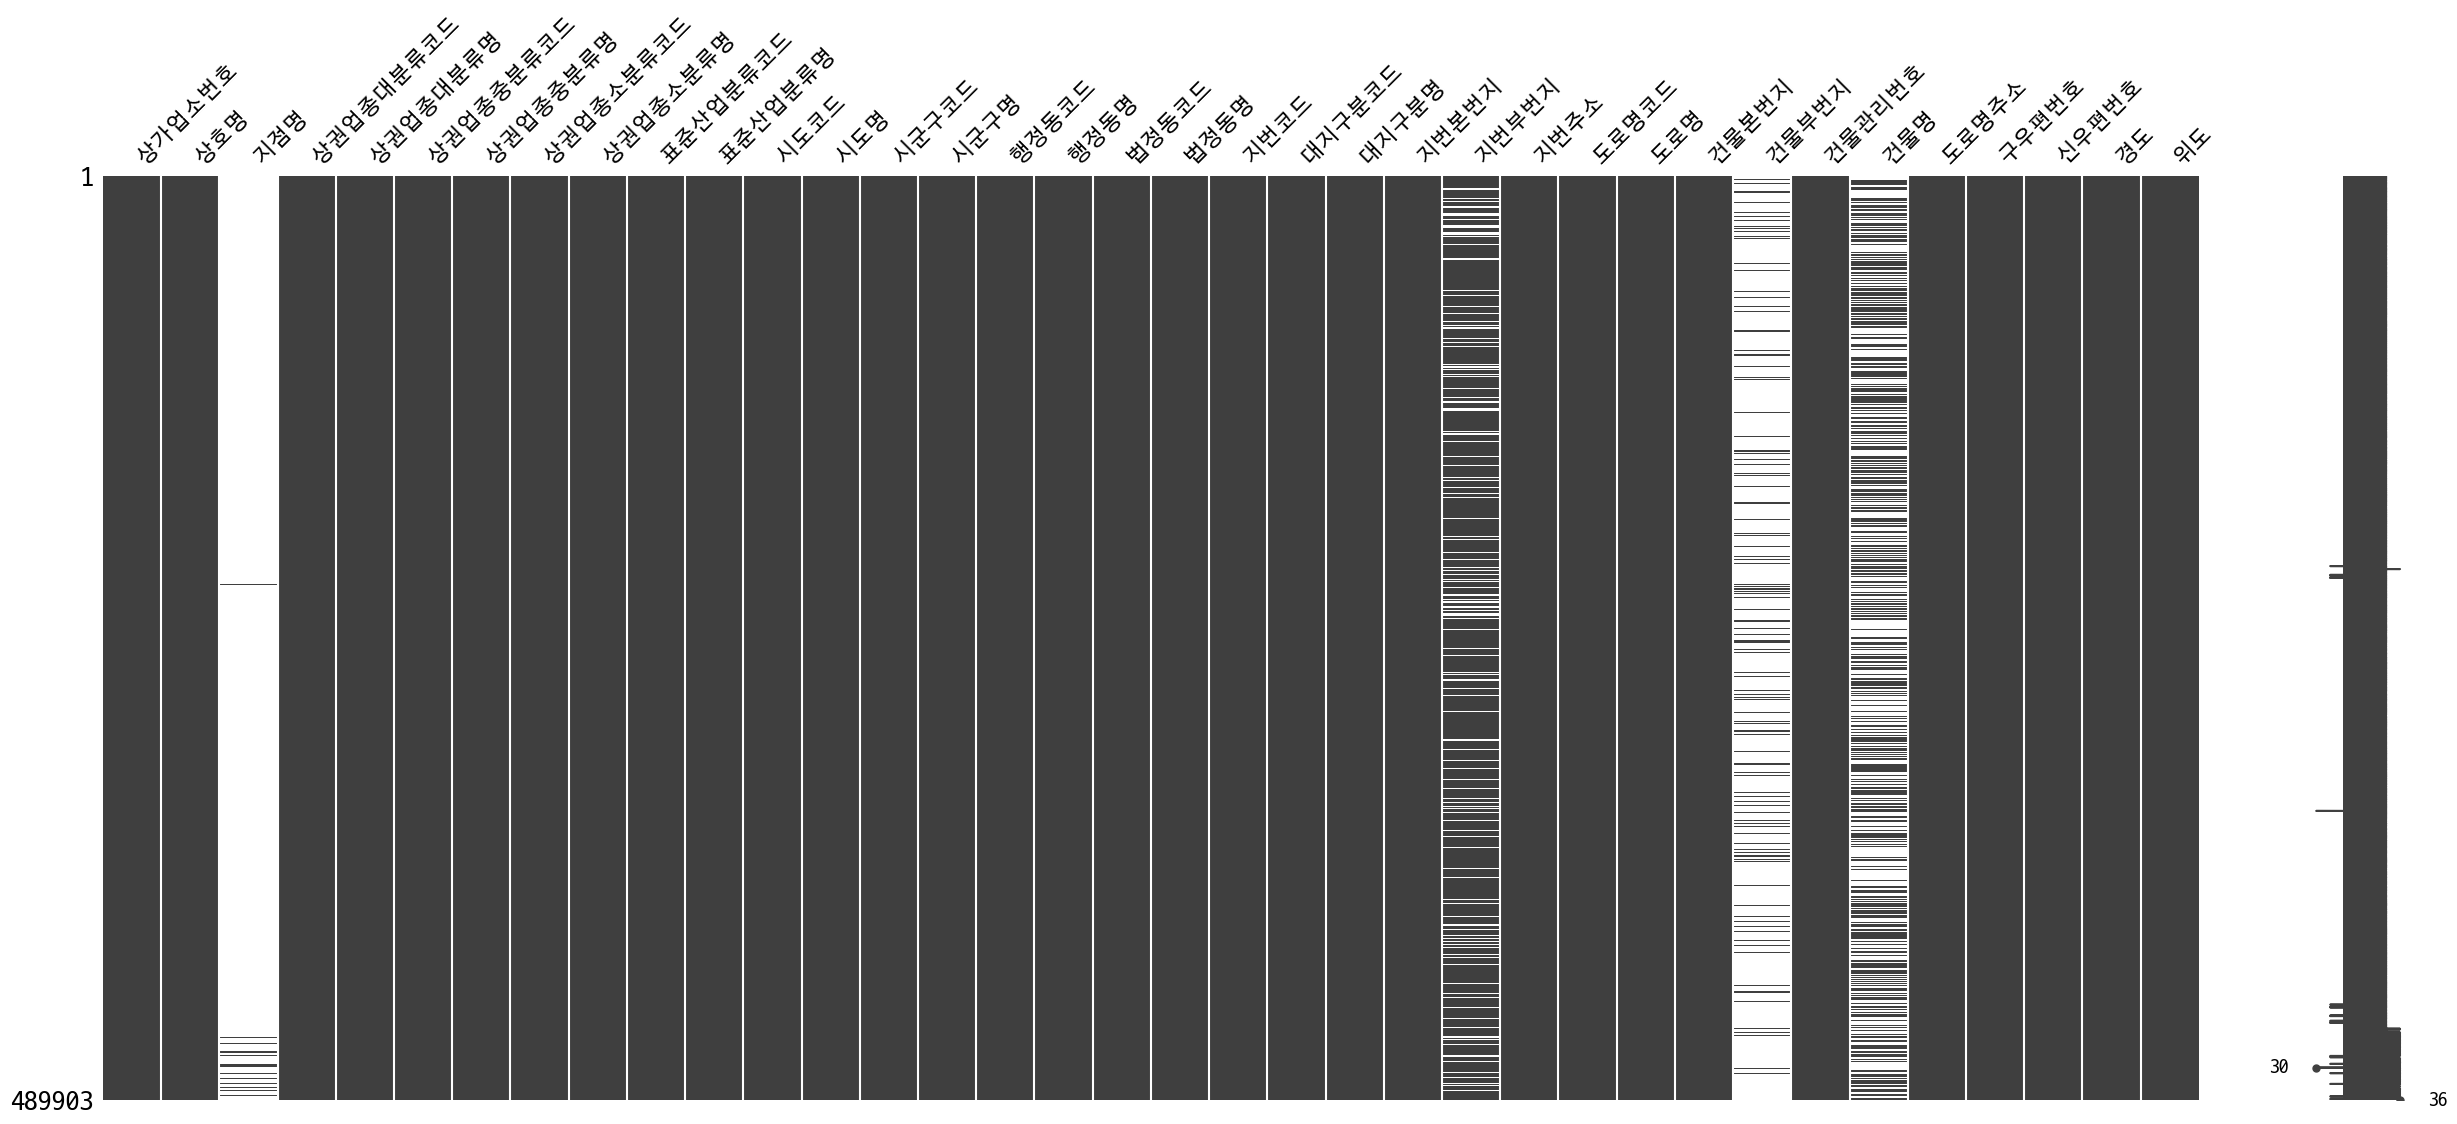

In [7]:
msno.matrix(shop , figsize=(30, 12))
plt.show()

In [8]:
value_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',  '상권업종소분류명',  '시도명','시군구명', '행정동명','법정동명', '지번주소', 
                 '도로명주소',  '경도', '위도']
shop_col = shop[value_columns]
shop_col

상호명  지점명 상권업종대분류명    상권업종중분류명        상권업종소분류명    시도명 시군구명  행정동명  \
0          영자's곱창  NaN       음식          한식        곱창 전골/구이  서울특별시  광진구  중곡3동   
1           호텔클로이  NaN       숙박       일반 숙박           여관/모텔  서울특별시   중구   광희동   
2       나라차중계태권도장  NaN       교육       기타 교육        태권도/무술학원  서울특별시  노원구  중계본동   
3           이상한스냅  NaN    과학·기술       사진 촬영           사진촬영업  서울특별시  양천구  신월5동   
4             토끼정  NaN       음식          한식          백반/한정식  서울특별시  강서구  가양1동   
...           ...  ...      ...         ...             ...    ...  ...   ...   
489898       저스트원  NaN    과학·기술       시장 조사  시장 조사 및 여론 조사업  서울특별시  송파구  문정2동   
489899      연리폼수선  NaN    수리·개인  기타 가정용품 수리       의류/이불 수선업  서울특별시  송파구   석촌동   
489900       아라리오  NaN    과학·기술   본사·경영 컨설팅         경영 컨설팅업  서울특별시  서초구  서초3동   
489901      출장마사지  NaN    수리·개인     욕탕·신체관리        체형/비만 관리  서울특별시  강남구  일원1동   
489902    경영 컨설팅업  NaN    과학·기술   본사·경영 컨설팅         경영 컨설팅업  서울특별시  구로구  구로5동   

         법정동명                  지번주소                 도로명주소          경도  \
0         중곡동  서울특별시 광진구 중곡동 169-21     서울특별시 광진구 면목로 172  127.082832   
1       광희동1가    서울특별시 중구 광희동1가 130    서울특별시 중구 을지로42길 11  127.005849   
2         중계동  서울특별시 노원구 중계동 364-19   서울특별시 노원구 한글비석로 242  127.076956   
3         신월동     서울특별시 양천구 신월동 9-4     서울특별시 양천구 월정로 283  126.828832   
4         마곡동  서울특별시 강서구 마곡동 774-12     서울특별시 강서구 마곡동로 55  126.833022   
...       ...                   ...                   ...         ...   
489898    문정동  서울특별시 송파구 문정동 651-14     서울특별시 송파구 법원로6길 7  127.121763   
489899    석촌동  서울특별시 송파구 석촌동 216-31   서울특별시 송파구 삼학사로8길 15  127.098631   
489900    서초동  서울특별시 서초구 서초동 1589-9  서울특별시 서초구 반포대로12길 37  127.013291   
489901    일원동     서울특별시 강남구 일원동 684      서울특별시 강남구 일원로 35  127.081173   
489902    구로동      서울특별시 구로구 구로동 26     서울특별시 구로구 새말로 102  126.891391   

               위도  
0       37.568503  
1       37.565708  
2       37.649226  
3       37.542117  
4       37.560053  
...           ...  
489898  37.483514  
489899  37.500180  
489900  37.485388  
489901  37.490630  
489902  37.505770  

[489903 rows x 13 columns]

In [9]:
del shop

In [10]:
shop_col.isnull().sum()

상호명              0
지점명         483821
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
시도명              0
시군구명             0
행정동명             0
법정동명             0
지번주소             0
도로명주소            0
경도               0
위도               0
dtype: int64

# 데이터프레임에서 서울 데이터만 추출한다.

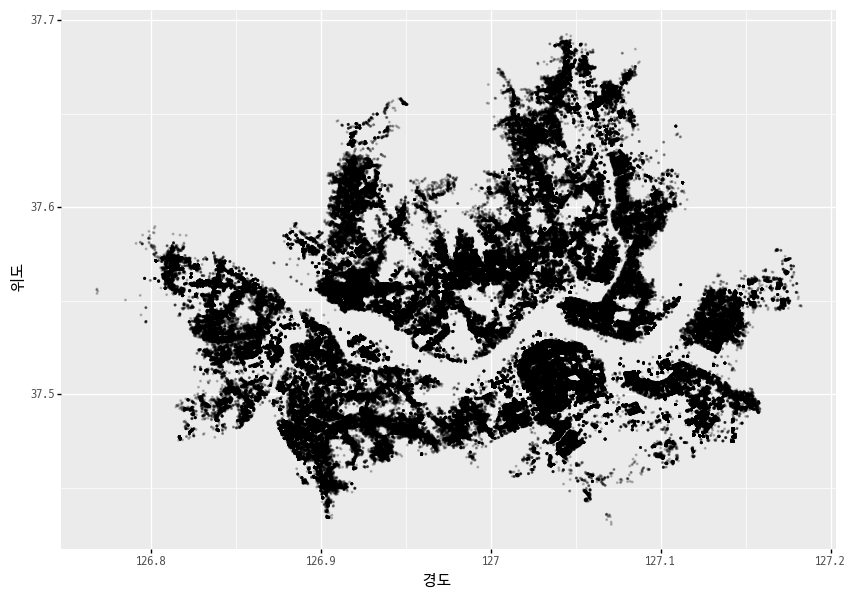

<ggplot: (-9223371918722987472)>

In [11]:
# 서울만 시각화해보면 서울 지도하고 비슷하게 나온다. 
(
    ggplot(shop_col, aes(x='경도', y='위도'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

# 데이터프레임의 도로명주소 열을 활용해서 '시도', '구군', '도로명' 열을 만든다.

In [12]:
# split() 메소드에 expend=True 옵션을 지정해서 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도''구군''도로명 열을 만든다.
print(type(shop_col[:1].도로명주소.str)) #Series에는 split속성이 없다. - 스트링으로 형변환
print(type(shop_col[:1].도로명주소.str.split(' '))) # 다시 시리즈로 변환
print('-' * 80)
print(type(shop_col[:1].도로명주소.str.split(' ' , expand=True))) # 데이터프레임으로 속성 변환
print(shop_col[:1].도로명주소.str.split(' ' , expand=True)[0]) # 데이터프레임의 열 이름을 추가
print(shop_col[:1].도로명주소.str.split(' ' , expand=True)[1])
print(shop_col[:1].도로명주소.str.split(' ' , expand=True)[2])

<class 'pandas.core.strings.accessor.StringMethods'>
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
0    서울특별시
Name: 0, dtype: object
0    광진구
Name: 1, dtype: object
0    면목로
Name: 2, dtype: object


In [13]:
shop_col['시도'] = shop_col.도로명주소.str.split(' ' , expand=True)[0]
shop_col['구군'] = shop_col.도로명주소.str.split(' ' , expand=True)[1]
shop_col['도로명'] = shop_col.도로명주소.str.split(' ' , expand=True)[2]
shop_col

상호명  지점명 상권업종대분류명    상권업종중분류명        상권업종소분류명    시도명 시군구명  행정동명  \
0          영자's곱창  NaN       음식          한식        곱창 전골/구이  서울특별시  광진구  중곡3동   
1           호텔클로이  NaN       숙박       일반 숙박           여관/모텔  서울특별시   중구   광희동   
2       나라차중계태권도장  NaN       교육       기타 교육        태권도/무술학원  서울특별시  노원구  중계본동   
3           이상한스냅  NaN    과학·기술       사진 촬영           사진촬영업  서울특별시  양천구  신월5동   
4             토끼정  NaN       음식          한식          백반/한정식  서울특별시  강서구  가양1동   
...           ...  ...      ...         ...             ...    ...  ...   ...   
489898       저스트원  NaN    과학·기술       시장 조사  시장 조사 및 여론 조사업  서울특별시  송파구  문정2동   
489899      연리폼수선  NaN    수리·개인  기타 가정용품 수리       의류/이불 수선업  서울특별시  송파구   석촌동   
489900       아라리오  NaN    과학·기술   본사·경영 컨설팅         경영 컨설팅업  서울특별시  서초구  서초3동   
489901      출장마사지  NaN    수리·개인     욕탕·신체관리        체형/비만 관리  서울특별시  강남구  일원1동   
489902    경영 컨설팅업  NaN    과학·기술   본사·경영 컨설팅         경영 컨설팅업  서울특별시  구로구  구로5동   

         법정동명                  지번주소                 도로명주소          경도  \
0         중곡동  서울특별시 광진구 중곡동 169-21     서울특별시 광진구 면목로 172  127.082832   
1       광희동1가    서울특별시 중구 광희동1가 130    서울특별시 중구 을지로42길 11  127.005849   
2         중계동  서울특별시 노원구 중계동 364-19   서울특별시 노원구 한글비석로 242  127.076956   
3         신월동     서울특별시 양천구 신월동 9-4     서울특별시 양천구 월정로 283  126.828832   
4         마곡동  서울특별시 강서구 마곡동 774-12     서울특별시 강서구 마곡동로 55  126.833022   
...       ...                   ...                   ...         ...   
489898    문정동  서울특별시 송파구 문정동 651-14     서울특별시 송파구 법원로6길 7  127.121763   
489899    석촌동  서울특별시 송파구 석촌동 216-31   서울특별시 송파구 삼학사로8길 15  127.098631   
489900    서초동  서울특별시 서초구 서초동 1589-9  서울특별시 서초구 반포대로12길 37  127.013291   
489901    일원동     서울특별시 강남구 일원동 684      서울특별시 강남구 일원로 35  127.081173   
489902    구로동      서울특별시 구로구 구로동 26     서울특별시 구로구 새말로 102  126.891391   

               위도     시도   구군      도로명  
0       37.568503  서울특별시  광진구      면목로  
1       37.565708  서울특별시   중구   을지로42길  
2       37.649226  서울특별시  노원구    한글비석로  
3       37.542117  서울특별시  양천구      월정로  
4       37.560053  서울특별시  강서구     마곡동로  
...           ...    ...  ...      ...  
489898  37.483514  서울특별시  송파구    법원로6길  
489899  37.500180  서울특별시  송파구   삼학사로8길  
489900  37.485388  서울특별시  서초구  반포대로12길  
489901  37.490630  서울특별시  강남구      일원로  
489902  37.505770  서울특별시  구로구      새말로  

[489903 rows x 16 columns]

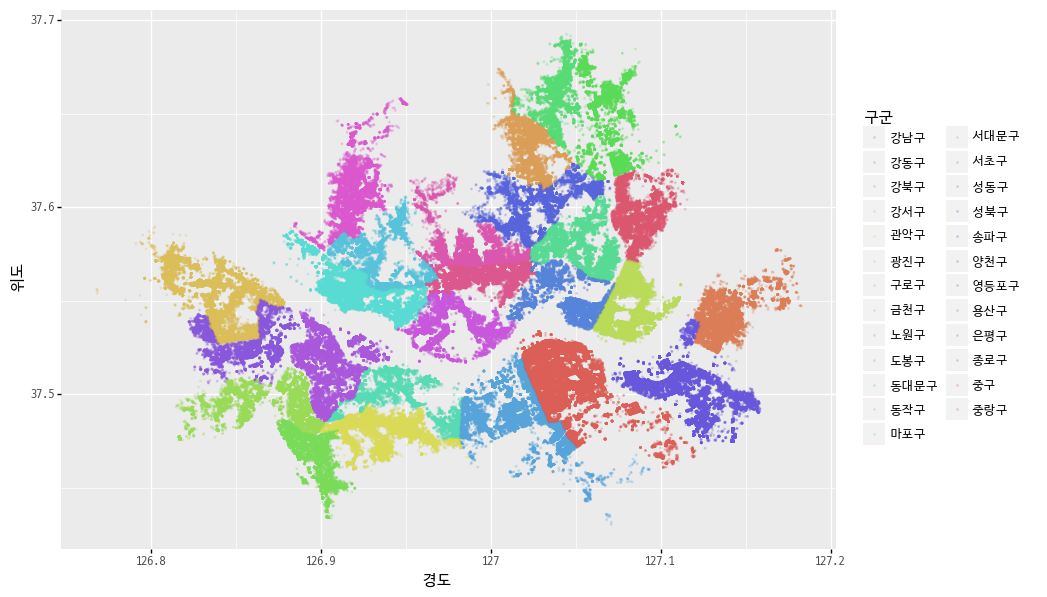

<ggplot: (-9223371918732753316)>

In [14]:
(
    ggplot(shop_col, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

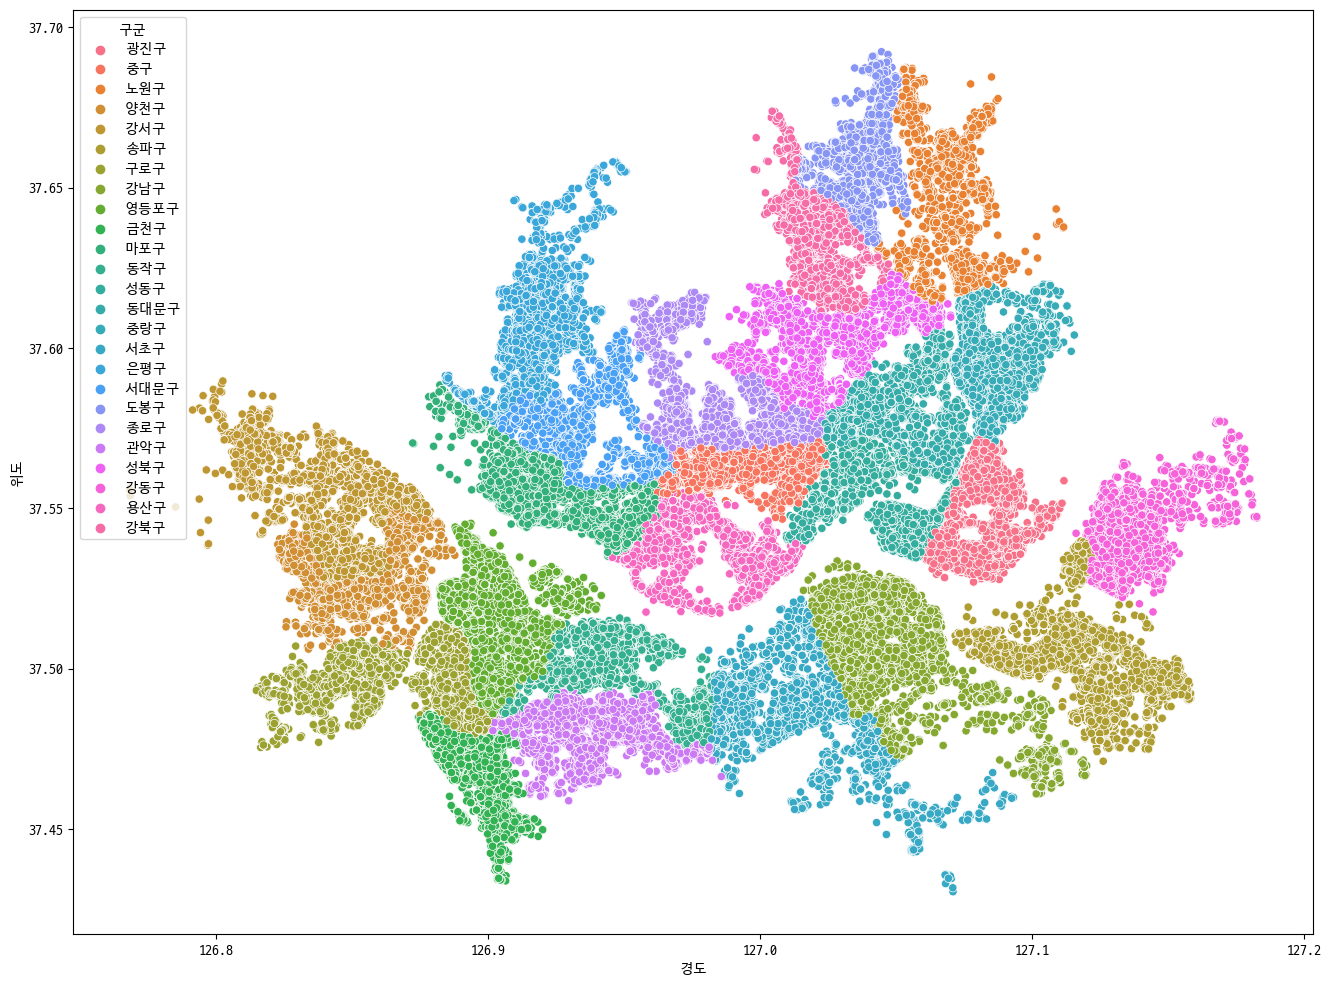

In [15]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_col, x = '경도', y = '위도', hue='구군')
plt.show()

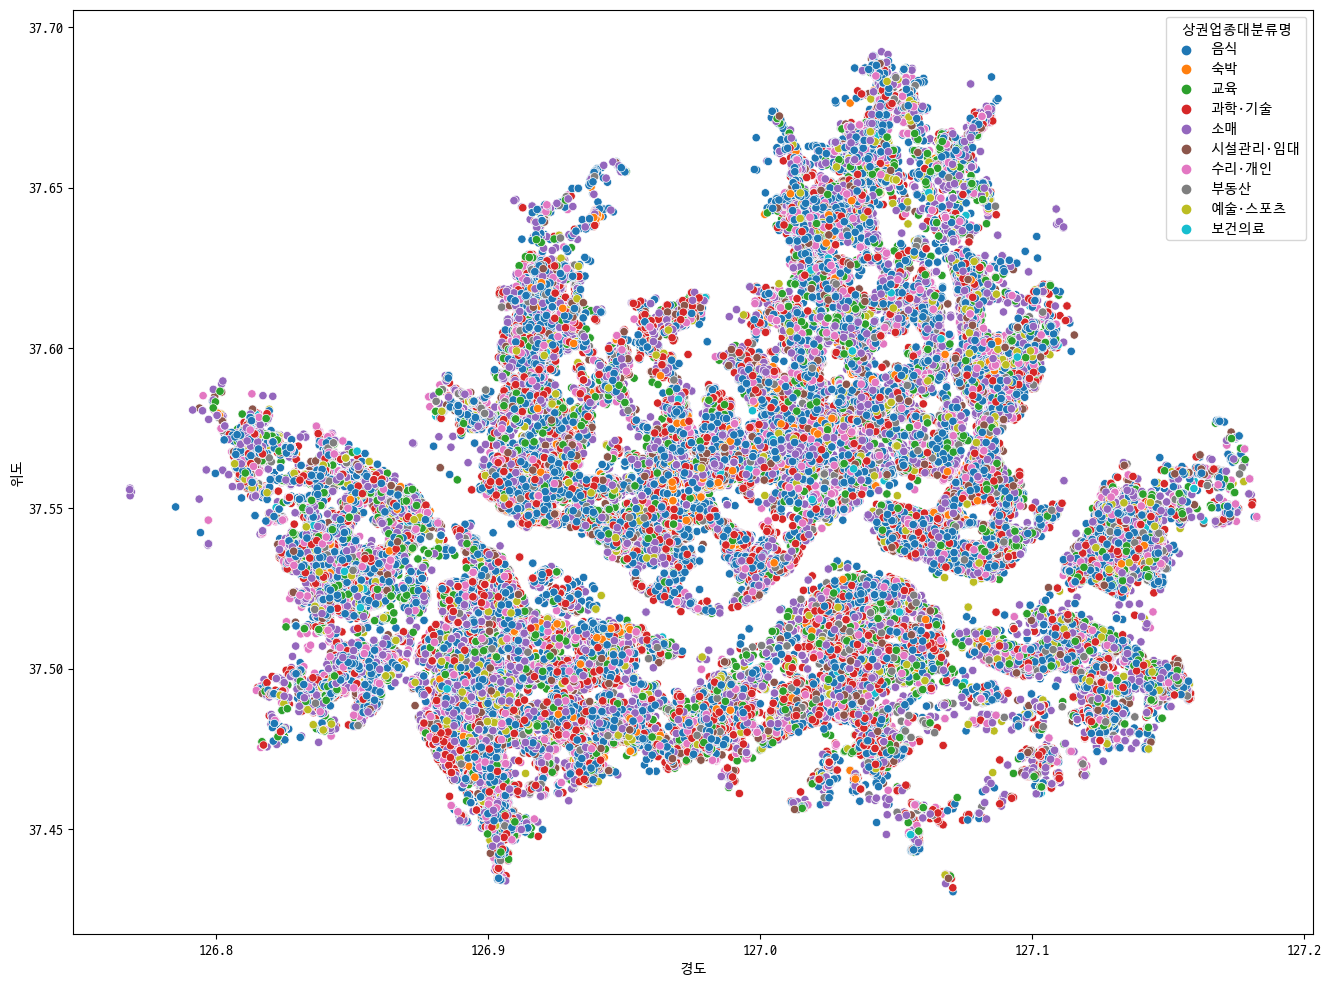

In [16]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_col, x = '경도', y = '위도', hue='상권업종대분류명')
plt.show()

In [17]:
shop_col = shop_col[shop_col.상권업종대분류명 == '교육']
shop_col

상호명  지점명 상권업종대분류명 상권업종중분류명        상권업종소분류명    시도명 시군구명  \
2         나라차중계태권도장  NaN       교육    기타 교육        태권도/무술학원  서울특별시  노원구   
11               볼벤  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  마포구   
29            엑스퍼트짐  NaN       교육    기타 교육     레크리에이션 교육기관  서울특별시  은평구   
42            율립연구소  NaN       교육    기타 교육      요가/필라테스 학원  서울특별시  송파구   
73               춤연  NaN       교육    기타 교육  기타 예술/스포츠 교육기관  서울특별시  서초구   
...             ...  ...      ...      ...             ...    ...  ...   
489849           야드  NaN       교육    교육 지원          교육컨설팅업  서울특별시  성동구   
489854  한국직업개발원동부지사  NaN       교육    기타 교육         직원 훈련기관  서울특별시  성동구   
489863          클래시  NaN       교육    기타 교육      요가/필라테스 학원  서울특별시  송파구   
489871  홍선생영어입시전문학원  NaN       교육    일반 교육         입시·교과학원  서울특별시  노원구   
489877       노원애니포스  NaN       교육    일반 교육         입시·교과학원  서울특별시  노원구   

          행정동명   법정동명                     지번주소                  도로명주소  \
2         중계본동    중계동     서울특별시 노원구 중계동 364-19    서울특별시 노원구 한글비석로 242   
11        성산1동    성산동     서울특별시 마포구 성산동 214-20  서울특별시 마포구 월드컵로30다길 41   
29        응암3동    응암동      서울특별시 은평구 응암동 119-1      서울특별시 은평구 응암로 269   
42         위례동    장지동        서울특별시 송파구 장지동 881    서울특별시 송파구 위례광장로 188   
73        양재1동    양재동       서울특별시 서초구 양재동 89-4    서울특별시 서초구 양재천로29길 3   
...        ...    ...                      ...                    ...   
489849  성수1가1동  성수동1가  서울특별시 성동구 성수동1가 656-462   서울특별시 성동구 왕십리로 66-10   
489854  성수1가2동  성수동1가   서울특별시 성동구 성수동1가 13-214     서울특별시 성동구 상원12길 30   
489863    잠실본동    잠실동     서울특별시 송파구 잠실동 183-12   서울특별시 송파구 백제고분로7길 41   
489871    중계본동    중계동     서울특별시 노원구 중계동 366-14    서울특별시 노원구 중계로18길 13   
489877  상계6.7동    상계동      서울특별시 노원구 상계동 730-3     서울특별시 노원구 동일로 1379   

                경도         위도     시도   구군       도로명  
2       127.076956  37.649226  서울특별시  노원구     한글비석로  
11      126.908665  37.562237  서울특별시  마포구  월드컵로30다길  
29      126.918749  37.596001  서울특별시  은평구       응암로  
42      127.142381  37.481079  서울특별시  송파구     위례광장로  
73      127.042226  37.479264  서울특별시  서초구   양재천로29길  
...            ...        ...    ...  ...       ...  
489849  127.044962  37.543207  서울특별시  성동구      왕십리로  
489854  127.050669  37.550029  서울특별시  성동구     상원12길  
489863  127.083559  37.510985  서울특별시  송파구   백제고분로7길  
489871  127.077803  37.651296  서울특별시  노원구    중계로18길  
489877  127.060878  37.651793  서울특별시  노원구       동일로  

[26633 rows x 16 columns]

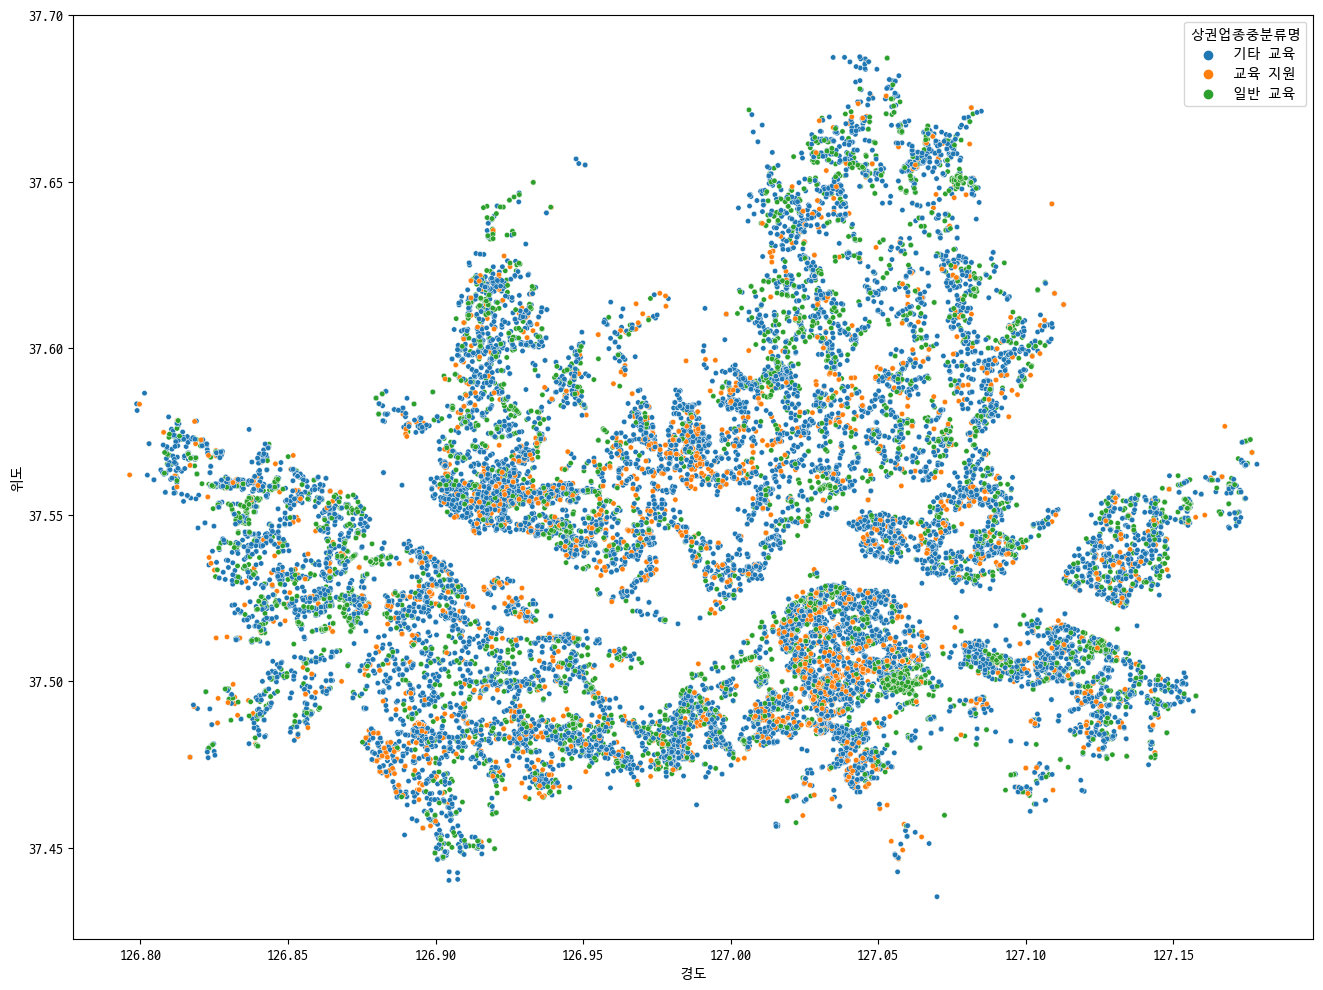

In [18]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_col, x = '경도', y = '위도', hue='상권업종중분류명', s=15)
plt.show()

# 입시 학원

In [19]:
shop_col_edu = shop_col[shop_col.상권업종소분류명 == '입시·교과학원']
shop_col_edu

상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명    행정동명  \
135       메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시   서초구    서초3동   
175     지아이에스강남인터내셔널스쿨  NaN       교육    일반 교육  입시·교과학원  서울특별시   서초구     내곡동   
233               생수학원  NaN       교육    일반 교육  입시·교과학원  서울특별시   강남구    대치2동   
234             목동진학학원  NaN       교육    일반 교육  입시·교과학원  서울특별시   구로구    개봉1동   
236          니키앤로라영어학원  NaN       교육    일반 교육  입시·교과학원  서울특별시   송파구    방이1동   
...                ...  ...      ...      ...      ...    ...   ...     ...   
489672        학원현장결제_1  NaN       교육    일반 교육  입시·교과학원  서울특별시   강남구    역삼1동   
489704       에듀플렉스길음보습  NaN       교육    일반 교육  입시·교과학원  서울특별시   성북구    길음2동   
489842   가재울정이조주니어영어학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서대문구   남가좌1동   
489871     홍선생영어입시전문학원  NaN       교육    일반 교육  입시·교과학원  서울특별시   노원구    중계본동   
489877          노원애니포스  NaN       교육    일반 교육  입시·교과학원  서울특별시   노원구  상계6.7동   

        법정동명                   지번주소                  도로명주소          경도  \
135      서초동   서울특별시 서초구 서초동 1542-5   서울특별시 서초구 서초대로42길 12  127.008519   
175      내곡동   서울특별시 서초구 내곡동 1-1969     서울특별시 서초구 샘마을2길 33  127.072451   
233      대치동   서울특별시 강남구 대치동 977-16    서울특별시 강남구 삼성로64길 51  127.064442   
234      개봉동      서울특별시 구로구 개봉동 476      서울특별시 구로구 경인로 382  126.863054   
236      방이동    서울특별시 송파구 방이동 201-3  서울특별시 송파구 위례성대로16길 27  127.124084   
...      ...                    ...                    ...         ...   
489672   역삼동    서울특별시 강남구 역삼동 647-9     서울특별시 강남구 테헤란로 131  127.032924   
489704   길음동     서울특별시 성북구 길음동 1278     서울특별시 성북구 숭인로2길 61  127.024953   
489842  남가좌동  서울특별시 서대문구 남가좌동 270-4      서울특별시 서대문구 수색로 48  126.913584   
489871   중계동   서울특별시 노원구 중계동 366-14    서울특별시 노원구 중계로18길 13  127.077803   
489877   상계동    서울특별시 노원구 상계동 730-3     서울특별시 노원구 동일로 1379  127.060878   

               위도     시도    구군       도로명  
135     37.491412  서울특별시   서초구   서초대로42길  
175     37.459799  서울특별시   서초구     샘마을2길  
233     37.501095  서울특별시   강남구    삼성로64길  
234     37.496382  서울특별시   구로구       경인로  
236     37.510373  서울특별시   송파구  위례성대로16길  
...           ...    ...   ...       ...  
489672  37.500075  서울특별시   강남구      테헤란로  
489704  37.609343  서울특별시   성북구     숭인로2길  
489842  37.570391  서울특별시  서대문구       수색로  
489871  37.651296  서울특별시   노원구    중계로18길  
489877  37.651793  서울특별시   노원구       동일로  

[6572 rows x 16 columns]

In [31]:
# '법정동명' 열을 기준으로 정렬
shop_col_edu_sort = shop_col_edu.sort_values(by='행정동명')

# 정렬된 데이터프레임 출력
shop_col_edu_sort
shop_col_edu_sort.to_csv('./data/shop_col_edu.csv', index=False)

In [55]:
width = pd.read_csv('./data/행정동 면적.csv')
width

시군구명  행정동명     면적
0    종로구    소계  23.91
1    종로구   사직동   1.23
2    종로구   삼청동   1.49
3    종로구   부암동   2.27
4    종로구   평창동   8.87
..   ...   ...    ...
446  강동구  둔촌1동   0.92
447  강동구  둔촌2동   1.56
448  강동구   강일동   2.26
449  강동구  상일1동   1.82
450  강동구  상일2동   1.09

[451 rows x 3 columns]

In [56]:
# '법정동명' 열을 기준으로 그룹화하고 각 그룹의 데이터 수를 카운트
count_by_dong = shop_col_edu.groupby('행정동명').size().reset_index(name='데이터 수')

# 결과 출력
count_by_dong
count_by_dong.to_csv('./data/count_by_dong.csv', index=False)

In [57]:
# '면적' 열을 추가하고 '행정동명'과 동일한 값으로 초기화
count_by_dong['면적'] = count_by_dong['행정동명']
count_by_dong

행정동명  데이터 수    면적
0    가락1동      9  가락1동
1    가락2동     22  가락2동
2    가락본동     14  가락본동
3    가리봉동      1  가리봉동
4     가산동      9   가산동
..    ...    ...   ...
410   효창동      6   효창동
411   후암동      6   후암동
412  휘경1동      3  휘경1동
413  휘경2동      9  휘경2동
414   흑석동     15   흑석동

[415 rows x 3 columns]

In [58]:
# 'count_by_dong' 데이터프레임에 '면적' 열을 추가하고 'width' 데이터프레임의 '면적' 값을 할당
count_by_dong['면적'] = width['면적']

# 결과 출력
print(count_by_dong)

     행정동명  데이터 수     면적
0    가락1동      9  23.91
1    가락2동     22   1.23
2    가락본동     14   1.49
3    가리봉동      1   2.27
4     가산동      9   8.87
..    ...    ...    ...
410   효창동      6   0.50
411   후암동      6   0.80
412  휘경1동      3   3.17
413  휘경2동      9   1.65
414   흑석동     15   0.79

[415 rows x 3 columns]


In [59]:
# 'count_by_dong'의 '행정동명'과 'width'의 '행정동명'을 기준으로 병합
count_by_dong = count_by_dong.merge(width[['행정동명', '면적']], on='행정동명', how='left')

# 결과 출력
print(count_by_dong)

     행정동명  데이터 수   면적_x  면적_y
0    가락1동      9  23.91  1.34
1    가락2동     22   1.23  0.96
2    가락본동     14   1.49  1.13
3    가리봉동      1   2.27  0.40
4     가산동      9   8.87  2.52
..    ...    ...    ...   ...
411   효창동      6   0.50  0.44
412   후암동      6   0.80  0.86
413  휘경1동      3   3.17  0.63
414  휘경2동      9   1.65  1.05
415   흑석동     15   0.79  1.68

[416 rows x 4 columns]


In [60]:
# 'count_by_dong'의 '행정동명'과 'width'의 '행정동명'을 기준으로 병합
count_by_dong = count_by_dong.merge(width[['행정동명', '면적']], on='행정동명', how='left')

# '면적' 열의 이름을 '면적_x'에서 '면적_y'로 변경
count_by_dong.rename(columns={'면적_x': '면적'}, inplace=True)

# 결과 출력
count_by_dong

행정동명  데이터 수     면적  면적_y    면적
0    가락1동      9  23.91  1.34  1.34
1    가락2동     22   1.23  0.96  0.96
2    가락본동     14   1.49  1.13  1.13
3    가리봉동      1   2.27  0.40  0.40
4     가산동      9   8.87  2.52  2.52
..    ...    ...    ...   ...   ...
413   효창동      6   0.50  0.44  0.44
414   후암동      6   0.80  0.86  0.86
415  휘경1동      3   3.17  0.63  0.63
416  휘경2동      9   1.65  1.05  1.05
417   흑석동     15   0.79  1.68  1.68

[418 rows x 5 columns]

In [61]:
# '행정동명'을 기준으로 두 데이터프레임을 병합
count_by_dong = count_by_dong.merge(width[['행정동명', '면적']], on='행정동명', how='left')

# 결과 출력
print(count_by_dong)

     행정동명  데이터 수   면적_x  면적_y  면적_x  면적_y
0    가락1동      9  23.91  1.34  1.34  1.34
1    가락2동     22   1.23  0.96  0.96  0.96
2    가락본동     14   1.49  1.13  1.13  1.13
3    가리봉동      1   2.27  0.40  0.40  0.40
4     가산동      9   8.87  2.52  2.52  2.52
..    ...    ...    ...   ...   ...   ...
417   효창동      6   0.50  0.44  0.44  0.44
418   후암동      6   0.80  0.86  0.86  0.86
419  휘경1동      3   3.17  0.63  0.63  0.63
420  휘경2동      9   1.65  1.05  1.05  1.05
421   흑석동     15   0.79  1.68  1.68  1.68

[422 rows x 6 columns]


In [62]:
# 'count_by_dong'의 '행정동명'과 'width'의 '행정동명'을 기준으로 병합
count_by_dong = count_by_dong.merge(width[['행정동명', '면적']], left_on='행정동명', right_on='행정동명', how='left')

# 결과 출력
print(count_by_dong)

     행정동명  데이터 수   면적_x  면적_y  면적_x  면적_y    면적
0    가락1동      9  23.91  1.34  1.34  1.34  1.34
1    가락2동     22   1.23  0.96  0.96  0.96  0.96
2    가락본동     14   1.49  1.13  1.13  1.13  1.13
3    가리봉동      1   2.27  0.40  0.40  0.40  0.40
4     가산동      9   8.87  2.52  2.52  2.52  2.52
..    ...    ...    ...   ...   ...   ...   ...
425   효창동      6   0.50  0.44  0.44  0.44  0.44
426   후암동      6   0.80  0.86  0.86  0.86  0.86
427  휘경1동      3   3.17  0.63  0.63  0.63  0.63
428  휘경2동      9   1.65  1.05  1.05  1.05  1.05
429   흑석동     15   0.79  1.68  1.68  1.68  1.68

[430 rows x 7 columns]


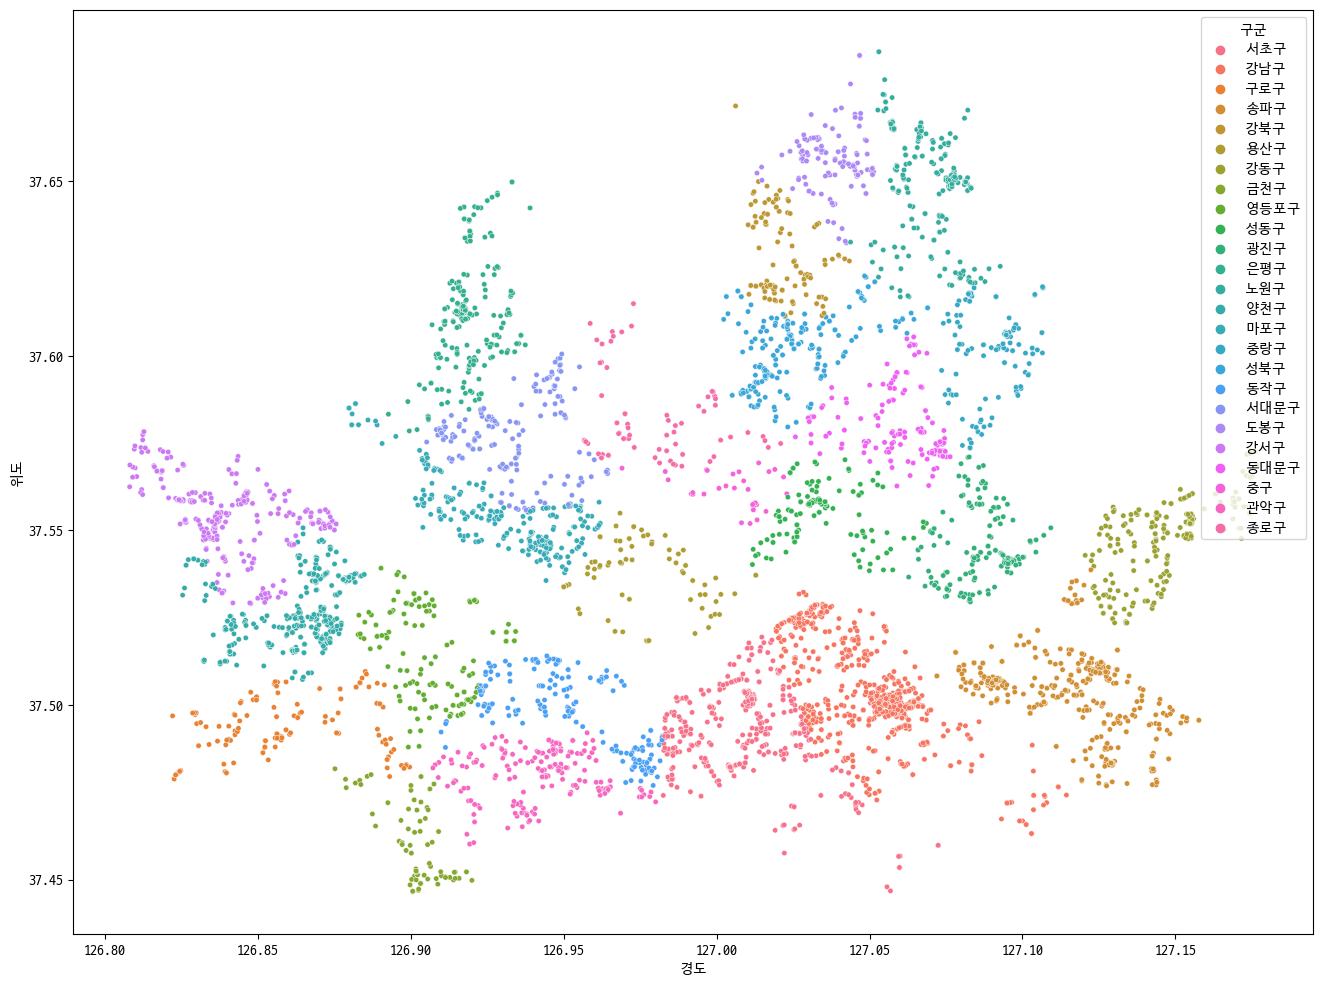

In [20]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_col_edu, x = '경도', y = '위도', hue='구군', s=15)
plt.show()

In [21]:
house = pd.read_csv('./data/서울특별시_전월세가_2022.csv')
house.head()
house.drop(['지번구분코드', '지번구분', '본번', '부번','층', '건축년도', '건물용도', '계약기간', '신규계약구분',
       '갱신청구권사용', '종전보증금', '종전임대료'] ,axis=1, inplace=True)
house.columns
value_columns = ['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '임대료(만원)', '건물명']
house_col = house[value_columns]
house_col

접수년도  자치구코드  자치구명  법정동코드   법정동명       계약일 전월세구분   임대면적  보증금(만원)  \
0       2022  11560  영등포구  12600  양평동2가  20220101    전세  18.84    16000   
1       2022  11560  영등포구  11800    도림동  20220101    월세  20.00      300   
2       2022  11215   광진구  10700    화양동  20220101    월세  27.82    10000   
3       2022  11620   관악구  10100    봉천동  20220101    월세  18.50     4000   
4       2022  11620   관악구  10100    봉천동  20220101    전세  14.00    13000   
...      ...    ...   ...    ...    ...       ...   ...    ...      ...   
560660  2022  11230  동대문구  10200    용두동  20221231    월세  43.00    17000   
560661  2023  11560  영등포구  13200    신길동  20221231    월세  37.00     1000   
560662  2023  11530   구로구  10700    개봉동  20221231    전세  37.00     8500   
560663  2023  11290   성북구  13300    정릉동  20221231    월세  63.57     5000   
560664  2023  11650   서초구  10300    우면동  20221231    월세  89.00    20000   

        임대료(만원)   건물명  
0             0  힘멜하임  
1            30   NaN  
2           135   NaN  
3            40   NaN  
4             0   NaN  
...         ...   ...  
560660       25   NaN  
560661       33   NaN  
560662        0   NaN  
560663       60   NaN  
560664       70   NaN  

[560665 rows x 11 columns]

In [22]:
# shop_col_edu 데이터프레임에서 지번주소의 3번째 스플릿 값을 추출하여 새로운 열을 만듭니다.
shop_col_edu['지번주소_3rd'] = shop_col_edu['지번주소'].str.split().str[2]

# house_col 데이터프레임에서 법정동명과 보증금(만원) 열을 추출합니다.
house_data = house_col[['법정동명', '보증금(만원)']]

# 두 데이터프레임을 지번주소_3rd와 법정동명 열을 기준으로 병합합니다.
merged_data = pd.merge(shop_col_edu, house_data, left_on='지번주소_3rd', right_on='법정동명', how='left')

merged_data

# # 필요한 열만 선택합니다.
# result_data = merged_data[['지번주소', '보증금(만원)_x']]

# # 열 이름을 변경합니다.
# result_data.columns = ['지번주소', '보증금(만원)']

# # 결과를 확인합니다.
# print(result_data.head())


상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명    행정동명  \
0         메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구    서초3동   
1         메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구    서초3동   
2         메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구    서초3동   
3         메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구    서초3동   
4         메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구    서초3동   
...                ...  ...      ...      ...      ...    ...  ...     ...   
29710273        노원애니포스  NaN       교육    일반 교육  입시·교과학원  서울특별시  노원구  상계6.7동   
29710274        노원애니포스  NaN       교육    일반 교육  입시·교과학원  서울특별시  노원구  상계6.7동   
29710275        노원애니포스  NaN       교육    일반 교육  입시·교과학원  서울특별시  노원구  상계6.7동   
29710276        노원애니포스  NaN       교육    일반 교육  입시·교과학원  서울특별시  노원구  상계6.7동   
29710277        노원애니포스  NaN       교육    일반 교육  입시·교과학원  서울특별시  노원구  상계6.7동   

         법정동명_x                  지번주소                 도로명주소          경도  \
0           서초동  서울특별시 서초구 서초동 1542-5  서울특별시 서초구 서초대로42길 12  127.008519   
1           서초동  서울특별시 서초구 서초동 1542-5  서울특별시 서초구 서초대로42길 12  127.008519   
2           서초동  서울특별시 서초구 서초동 1542-5  서울특별시 서초구 서초대로42길 12  127.008519   
3           서초동  서울특별시 서초구 서초동 1542-5  서울특별시 서초구 서초대로42길 12  127.008519   
4           서초동  서울특별시 서초구 서초동 1542-5  서울특별시 서초구 서초대로42길 12  127.008519   
...         ...                   ...                   ...         ...   
29710273    상계동   서울특별시 노원구 상계동 730-3    서울특별시 노원구 동일로 1379  127.060878   
29710274    상계동   서울특별시 노원구 상계동 730-3    서울특별시 노원구 동일로 1379  127.060878   
29710275    상계동   서울특별시 노원구 상계동 730-3    서울특별시 노원구 동일로 1379  127.060878   
29710276    상계동   서울특별시 노원구 상계동 730-3    서울특별시 노원구 동일로 1379  127.060878   
29710277    상계동   서울특별시 노원구 상계동 730-3    서울특별시 노원구 동일로 1379  127.060878   

                 위도     시도   구군      도로명 지번주소_3rd 법정동명_y  보증금(만원)  
0         37.491412  서울특별시  서초구  서초대로42길      서초동    서초동   5950.0  
1         37.491412  서울특별시  서초구  서초대로42길      서초동    서초동  63000.0  
2         37.491412  서울특별시  서초구  서초대로42길      서초동    서초동    500.0  
3         37.491412  서울특별시  서초구  서초대로42길      서초동    서초동  26770.0  
4         37.491412  서울특별시  서초구  서초대로42길      서초동    서초동  11500.0  
...             ...    ...  ...      ...      ...    ...      ...  
29710273  37.651793  서울특별시  노원구      동일로      상계동    상계동   1000.0  
29710274  37.651793  서울특별시  노원구      동일로      상계동    상계동  20000.0  
29710275  37.651793  서울특별시  노원구      동일로      상계동    상계동  27000.0  
29710276  37.651793  서울특별시  노원구      동일로      상계동    상계동  24200.0  
29710277  37.651793  서울특별시  노원구      동일로      상계동    상계동  26000.0  

[29710278 rows x 19 columns]

In [23]:
seoul = pd.read_csv('./data/아파트 실거래가.csv')
seoul.head()

시군구     번지      본번   부번             단지명  전용면적(㎡)    계약년월  계약일  \
0  서울특별시 강남구 개포동  658-1   658.0  1.0  개포6차우성아파트1동~8동    79.97  202204   12   
1  서울특별시 강남구 개포동  658-1   658.0  1.0  개포6차우성아파트1동~8동    79.97  202204   21   
2  서울특별시 강남구 개포동  658-1   658.0  1.0  개포6차우성아파트1동~8동    79.97  202205   27   
3  서울특별시 강남구 개포동   1282  1282.0  0.0       개포래미안포레스트   102.32  202204    1   
4  서울특별시 강남구 개포동   1282  1282.0  0.0       개포래미안포레스트   136.06  202205    2   

         거래금액(만원)   층  건축년도      도로명  해제사유발생일 등기일자  거래유형          중개사소재지  
0         220,000   4  1987    언주로 3      NaN       중개거래          서울 강남구  
1         220,000   2  1987    언주로 3      NaN       중개거래          서울 강남구  
2         216,000   2  1987    언주로 3      NaN       중개거래          서울 강남구  
3         369,000  13  2020  개포로 264      NaN       중개거래  서울 강남구, 서울 양천구  
4         420,000  17  2020  개포로 264      NaN       중개거래          서울 강남구

In [24]:
seoul.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일', '등기일자', '거래유형', '중개사소재지'],
      dtype='object')

In [25]:
print(len(seoul))

12685
